In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv('loan_prediction.csv')

In [12]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
data.shape

(614, 13)

In [15]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Checking for null values

In [16]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Let's deal with null values and zero values

In [17]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [18]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [19]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [20]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [21]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [22]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [23]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [24]:
data['CoapplicantIncome']=data['CoapplicantIncome'].replace(0.0,data['CoapplicantIncome'].mean())

#### Let's check empty values

In [25]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of empty values in column 
    count = (column == '').sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Loan_ID  is :  0
Count of zeros in column  Gender  is :  0
Count of zeros in column  Married  is :  0
Count of zeros in column  Dependents  is :  0
Count of zeros in column  Education  is :  0
Count of zeros in column  Self_Employed  is :  0
Count of zeros in column  ApplicantIncome  is :  0
Count of zeros in column  CoapplicantIncome  is :  0
Count of zeros in column  LoanAmount  is :  0
Count of zeros in column  Loan_Amount_Term  is :  0
Count of zeros in column  Credit_History  is :  0
Count of zeros in column  Property_Area  is :  0
Count of zeros in column  Loan_Status  is :  0


fine now no empty values present

Seperate DataFrame for the categorical columns

In [26]:
df_categorical=pd.DataFrame(data[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']])
df_categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


Seperate dataframe for the continuous columns

In [27]:
df_continuous=pd.DataFrame(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
df_continuous

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,1621.245798,146.412162,360.0,1.0
1,4583,1508.000000,128.000000,360.0,1.0
2,3000,1621.245798,66.000000,360.0,1.0
3,2583,2358.000000,120.000000,360.0,1.0
4,6000,1621.245798,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,1621.245798,71.000000,360.0,1.0
610,4106,1621.245798,40.000000,180.0,1.0
611,8072,240.000000,253.000000,360.0,1.0
612,7583,1621.245798,187.000000,360.0,1.0


### Visualization of the Categorical columns

Male      502
Female    112
Name: Gender, dtype: int64


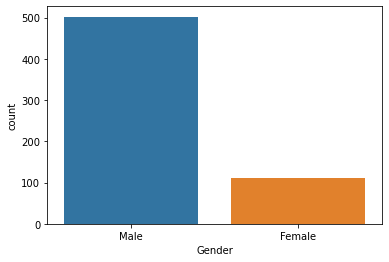

In [50]:
ax=sns.countplot(x='Gender',data=df_categorical)
print(df_categorical['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


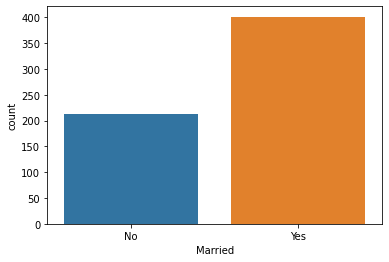

In [29]:
ax=sns.countplot(x='Married',data=df_categorical)
print(df_categorical['Married'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


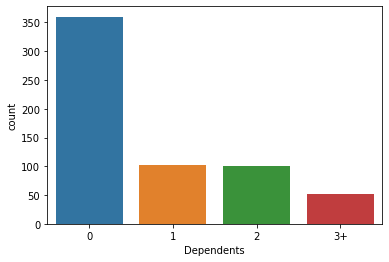

In [30]:
ax=sns.countplot(x='Dependents',data=df_categorical)
print(df_categorical['Dependents'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


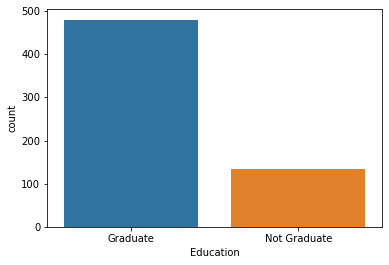

In [31]:
ax=sns.countplot(x='Education',data=df_categorical)
print(df_categorical['Education'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


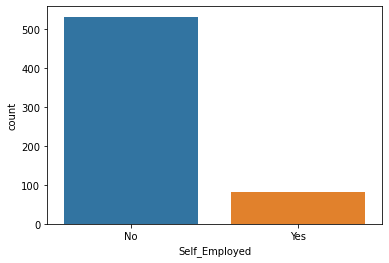

In [32]:
ax=sns.countplot(x='Self_Employed',data=df_categorical)
print(df_categorical['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


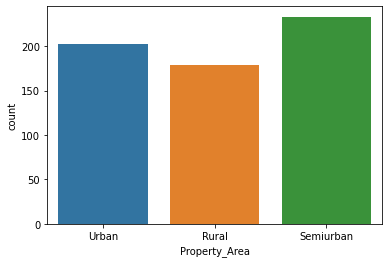

In [33]:
ax=sns.countplot(x='Property_Area',data=df_categorical)
print(df_categorical['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


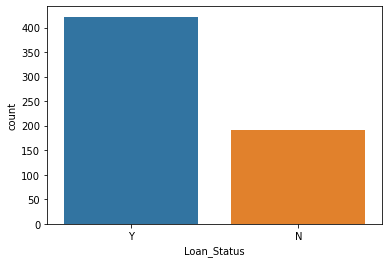

In [34]:
ax=sns.countplot(x='Loan_Status',data=df_categorical)
print(df_categorical['Loan_Status'].value_counts())

### Visualization of continuous data

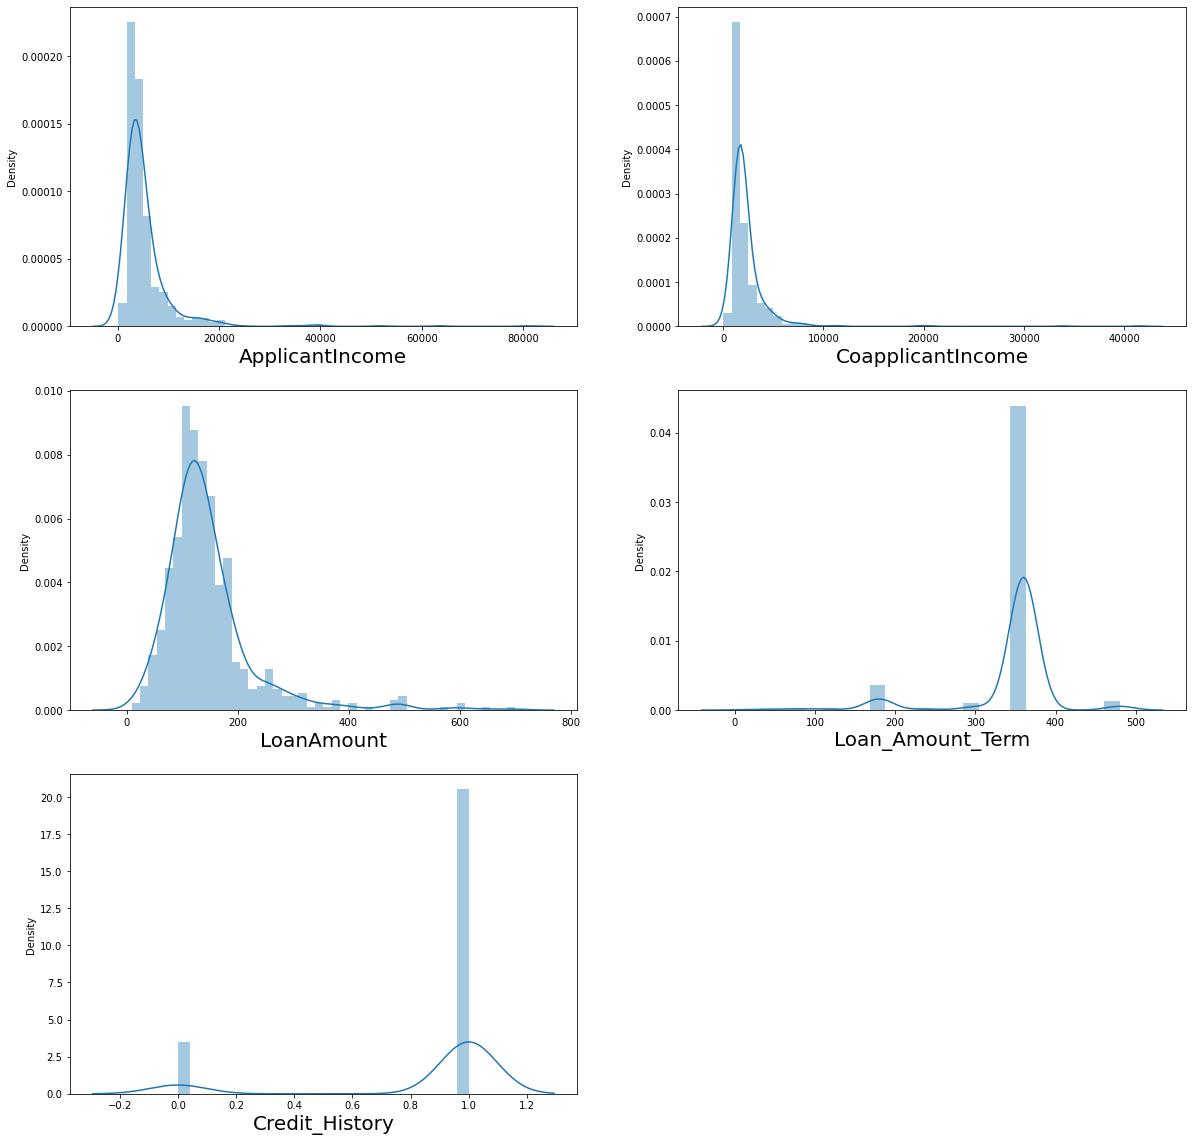

In [35]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_continuous:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding of the Dataset

In [36]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [37]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,1621.245798,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,1621.245798,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.000000,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,1621.245798,187.000000,360.0,1.0,2,1


### Checking Correlation

In [38]:
data.corr()['Loan_Status']

Loan_ID              0.011773
Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.089189
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

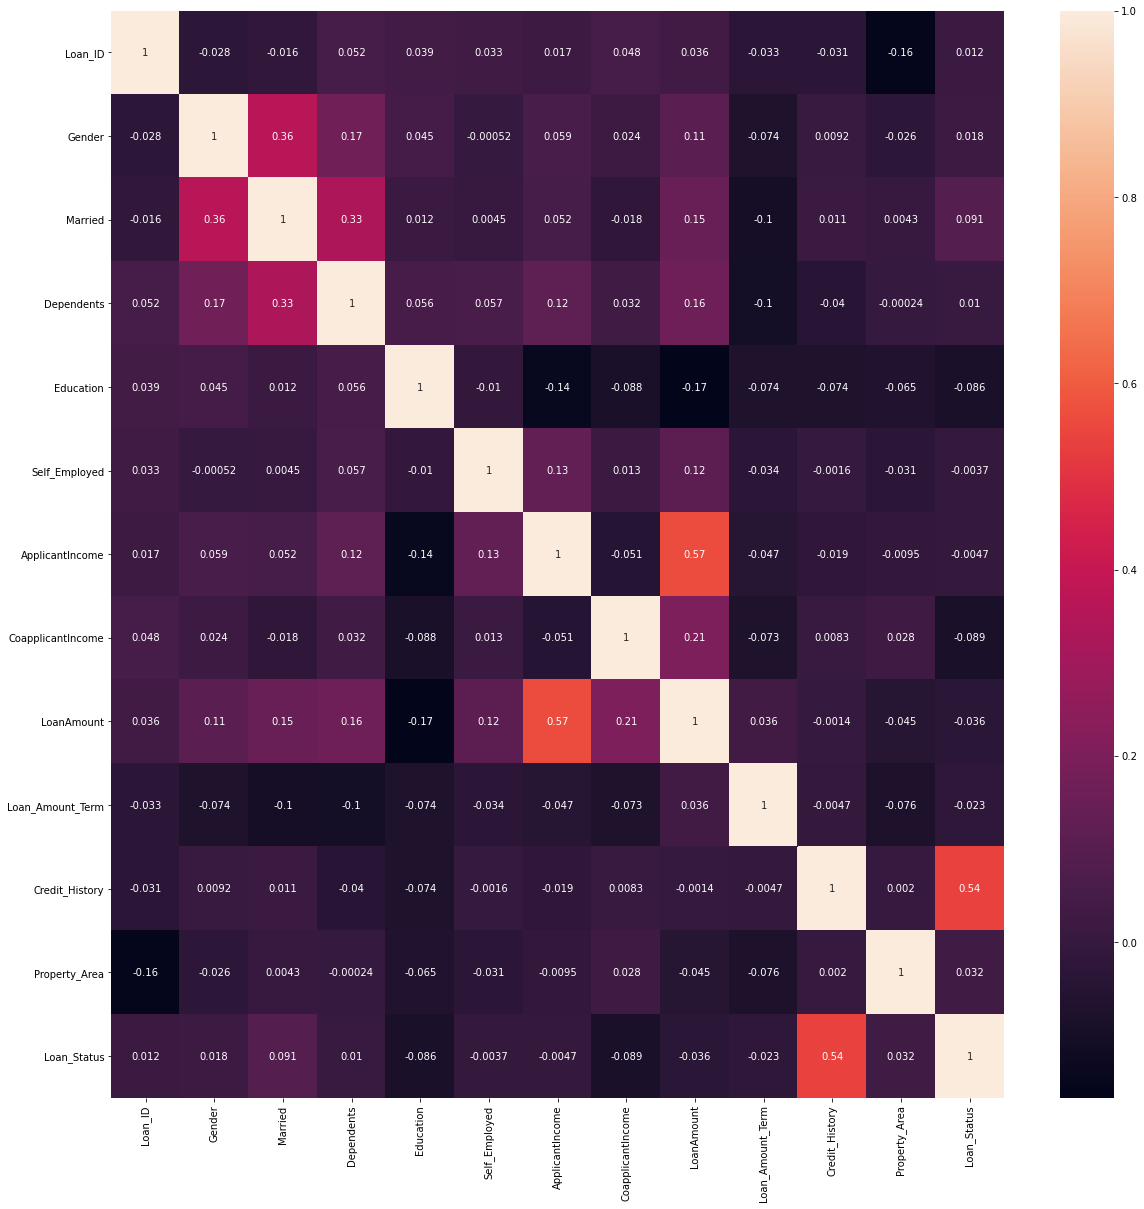

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Dropping columns which has less relationship

In [40]:
data_new=data.drop(columns=['Self_Employed','ApplicantIncome','Dependents','Gender','Loan_ID'])

In [41]:
data_new

,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1621.245798,146.412162,360.0,1.0,2,1
1,1,0,1508.000000,128.000000,360.0,1.0,0,0
2,1,0,1621.245798,66.000000,360.0,1.0,2,1
3,1,1,2358.000000,120.000000,360.0,1.0,2,1
4,0,0,1621.245798,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,0,1621.245798,71.000000,360.0,1.0,0,1
610,1,0,1621.245798,40.000000,180.0,1.0,0,1
611,1,0,240.000000,253.000000,360.0,1.0,2,1
612,1,0,1621.245798,187.000000,360.0,1.0,2,1


### Checking for outliers using boxplot

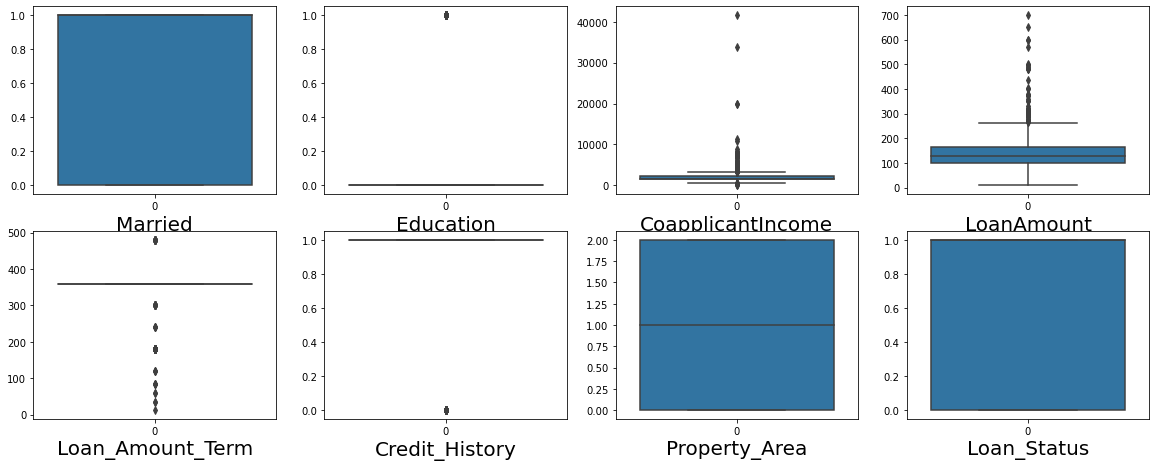

In [42]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=10:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We are not removing the outliers since these are the possible outcome

### Dividing the Dataset into dependent and independent variable

In [51]:
x=data_new.drop(columns='Loan_Status')
y=data_new['Loan_Status']

In [52]:
x

,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,1621.245798,146.412162,360.0,1.0,2
1,1,0,1508.000000,128.000000,360.0,1.0,0
2,1,0,1621.245798,66.000000,360.0,1.0,2
3,1,1,2358.000000,120.000000,360.0,1.0,2
4,0,0,1621.245798,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...
609,0,0,1621.245798,71.000000,360.0,1.0,0
610,1,0,1621.245798,40.000000,180.0,1.0,0
611,1,0,240.000000,253.000000,360.0,1.0,2
612,1,0,1621.245798,187.000000,360.0,1.0,2


In [53]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

### Checking Skewness

In [54]:
x.skew().sort_values()

Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Married             -0.644850
Property_Area       -0.066196
Education            1.367622
LoanAmount           2.726601
CoapplicantIncome    9.677699
dtype: float64

### Transform data to remove skewness

In [55]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [56]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-1.37208932e+00, -5.28362249e-01, -3.45723484e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 7.28815525e-01, -5.28362249e-01, -4.79743455e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.45723484e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 7.28815525e-01, -5.28362249e-01, -3.84602724e+00, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 7.28815525e-01, -5.28362249e-01, -3.45723484e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [-1.37208932e+00, -5.28362249e-01, -3.45723484e-01, ...,
         1.75540037e-01, -2.42876026e+00,  2.36103342e-03]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [57]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.056792,Married
1,1.044842,Education
2,1.093743,CoapplicantIncome
3,1.154456,LoanAmount
4,1.034415,Loan_Amount_Term
5,1.007930,Credit_History
6,1.017324,Property_Area


All the VIF values are less than 5 and are very low.That means no multicollinearity.

### Finding the best random state

In [58]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.9090909090909091 on Random State  955


### Splitting data Into Training and test data

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=955)

### Logistic Regression

In [60]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

90.9090909090909
[[  4  32]
 [ 17 101]]
              precision    recall  f1-score   support

           0       0.19      0.11      0.14        36
           1       0.76      0.86      0.80       118

    accuracy                           0.68       154
   macro avg       0.47      0.48      0.47       154
weighted avg       0.63      0.68      0.65       154



### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  73.37662337662337
[[23 13]
 [28 90]]
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        36
           1       0.87      0.76      0.81       118

    accuracy                           0.73       154
   macro avg       0.66      0.70      0.67       154
weighted avg       0.77      0.73      0.75       154



### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  79.87012987012987
[[27  9]
 [22 96]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.64        36
           1       0.91      0.81      0.86       118

    accuracy                           0.80       154
   macro avg       0.73      0.78      0.75       154
weighted avg       0.83      0.80      0.81       154



### SVC

In [63]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  89.6103896103896
[[ 23  13]
 [  3 115]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        36
           1       0.90      0.97      0.93       118

    accuracy                           0.90       154
   macro avg       0.89      0.81      0.84       154
weighted avg       0.90      0.90      0.89       154



Logistic Regression  and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.809462881514061


In [66]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.6839664134346262


In [67]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.7524590163934426


In [68]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.8061841929894709


Logistic Regression is Performing better among all so we will continue with Logistic Regression

### ROC AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

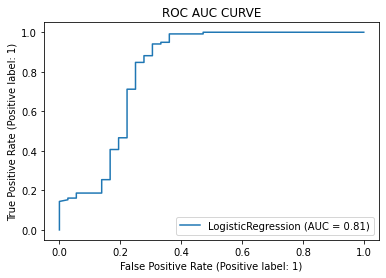

In [69]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

Since Logistic Regression is performing best and it is not capabile of hyperparameter tuning ,So we choose Logistic Regression as the final model

### Saving the model in pickel

In [70]:
import pickle
filename='LoanPrediction_model.pickle'
pickle.dump(LR,open(filename,'wb'))

# Documentation

In [ ]:
Import the csv file then seen the data we found null values in the columns so we delt with that.
Then the vizualization of the categorical and continuous data is done and seen some skewness in the continuous data that was removed with the power transform function.
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['Self_Employed','ApplicantIncome','Dependents','Gender','Loan_ID'] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and found that lots of data are the outliers  we didn't remove them as they are possible outcomes.
After scaling the data we checked for multicollinearity and not found in columns.
After that we trained the model with several algorithms and found Logistic Regression as the best algo for classification problem.
The ROC AUC curve is made and 81% is covered.
In the last we saved the model.